<a href="https://colab.research.google.com/github/CandidoJr209/ImageProcessing/blob/main/BasicManipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this notebook we'll explore some basic concepts about image processing such as image rotation, resizing, cropping, brightness control and more. The idea is to analyze both the theory behind the concepts as well as the more practical implementation using python. We'll be working with the Lena image, you can get it in this link: http://optipng.sourceforge.net/pngtech/img/lena.png and save in your computer as 'Lena.png'



# **Fundamental Operations**

The first step is to load the image, for that we’ll run the following code:


In [2]:
import cv2
from google.colab import files

uploaded = files.upload() # Choose the Lenna image

Saving Lena.png to Lena.png


In [5]:
img = cv2.imread('Lena.png',0) # Load grayscale image 
img_color = cv2.imread('Lena.png') # Load colored image 

We can check some attributes such as the dimentions of the image and the data type

In [6]:
print(img.shape)

(512, 512)


In [7]:
print(img.dtype)

uint8


Digital images consist of a matrix containing the values for the intensity, each called a pixel. In this case we have a $512x512$ matrix. 

$A_{512,512} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,512} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,512} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{512,1} & a_{512,2} & \cdots & a_{512,512}
 \end{pmatrix}$

These pixels can assume a finite number of values. In the case of an uint8 image, each pixel is expressed by an unsigned integer that can assume $2^8 = 256$ different values, that is, they can range between $0$ and $255$, $0$ represents the color black and $255$ white, all the values in between are different shades of gray.

If we want to visualize the image we could use the following command:

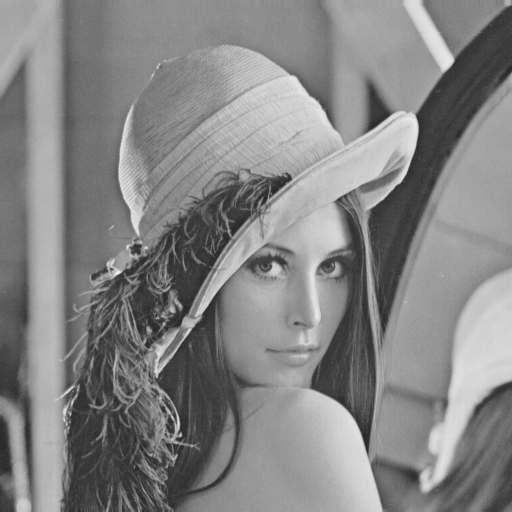

In [8]:
 from google.colab.patches import cv2_imshow

cv2_imshow(img)              # Show the image
cv2.waitKey(0)               # Keeps the window open until a key is pressed
cv2.destroyAllWindows()      # Takes care of memory deallocation 

If we want to resize the image, for example we could use the following code:


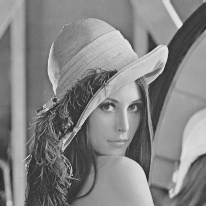

In [ ]:
img_resized = cv2.resize(img,(206,206)) # Resize image to 206 x 206
 
cv2_imshow(img_resized)              # Show the image
cv2.waitKey(0)                       # Keeps the window open until a key is pressed
cv2.destroyAllWindows()              # Takes care of memory deallocation 

If we want to rotate the image, for example we could use the following code:


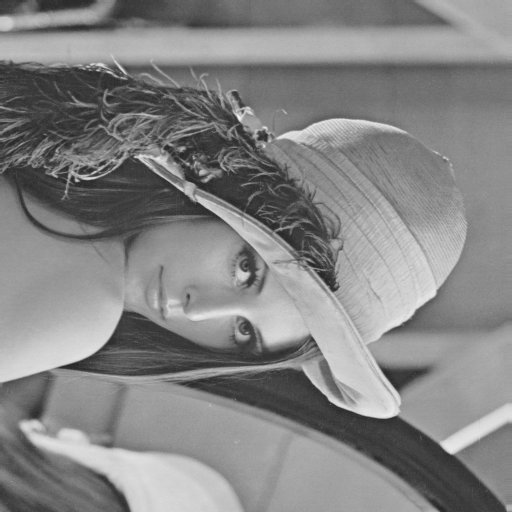

In [ ]:
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # Rotate image 90 degrees clockwise
 
cv2_imshow(img_rotated)              # Show the image
cv2.waitKey(0)                       # Keeps the window open until a key is pressed
cv2.destroyAllWindows()              # Takes care of memory deallocation 

We can use also the cv2.ROTATE_90_COUNTERCLOCKWISE or cv2.ROTATE_180
flags with this function. We can even use another function called cv2.getRotationMatrix2D() to rotate it in an arbitrary angle


# **Working** **with** **pixels**

Now we can start talking about histograms. Every grayscale digital image has an histogram associated with it. It consists basically of a plot of intensity values against their respective occurrence frequencies. We can build a function that plots a histogram like that:



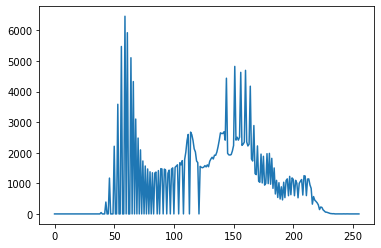

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def plot_hist(img):
 
    hist = np.zeros(256) # Initialize vector hist with zeros
 
    for x in range(0,img.shape[0]):   
        for y in range(0,img.shape[1]):
            hist[img[x,y]] = hist[img[x,y]] + 1 
            # Add 1 to the occurrence frequency 
            # of the intensity on an given pixel
            # for every pixel in the image
        
    plt.plot(hist)
    plt.show()
 
plot_hist(img)

There’s a function in matplotlib that does that for us:

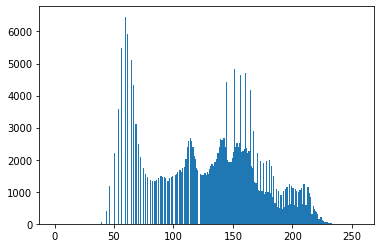

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

As we saw, each pixel of an uint8 image has integer values that range between 0 and 255, but we can reduce the number of possible values, this will affect our capacity to distinguish objects in the image:

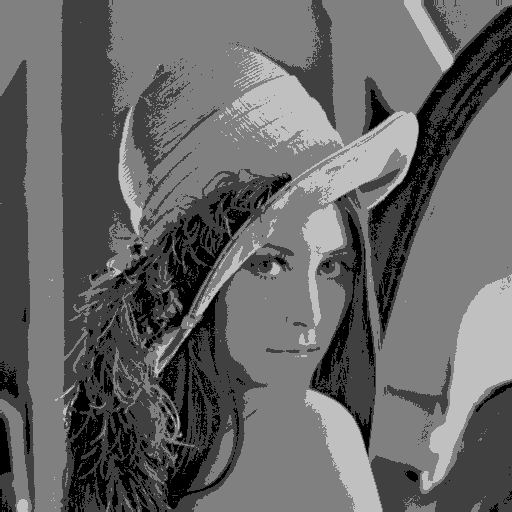

In [ ]:
def image_depth(img, depth_bits):
    img_depth = np.zeros_like(img) # Create a mask with zeros, same size as the image

    cons = 2**(8-depth_bits)  # Use the depth value to calculate the ajdusting constant
    for x in range(0,512):
        for y in range(0,512):
            img_depth[x,y] = cons * (img[x,y] // cons)  # Update pixel value
 
    return img_depth

img_depth = image_depth(img,2)
 
cv2_imshow(img_depth)
cv2.waitKey(0)
cv2.destroyAllWindows()

If we compare the histograms of the images we’ll see how the amount of possible values for each pixel has changed.

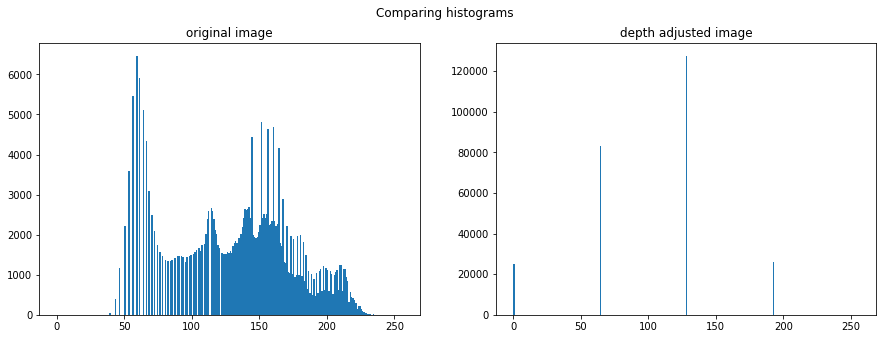

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Comparing histograms')
ax1.hist(img.ravel(),256,[0,256])
ax1.set_title('original image')
ax2.hist(img_depth.ravel(),256,[0,256])
ax2.set_title('depth adjusted image')
plt.show()

# **Colored images**

Now that we’ve learnt how to work with grayscale images we can move on to color images. The opencv standard palette uses a B G R color scheme, we can visualize each color channel by using the code shown bellow:


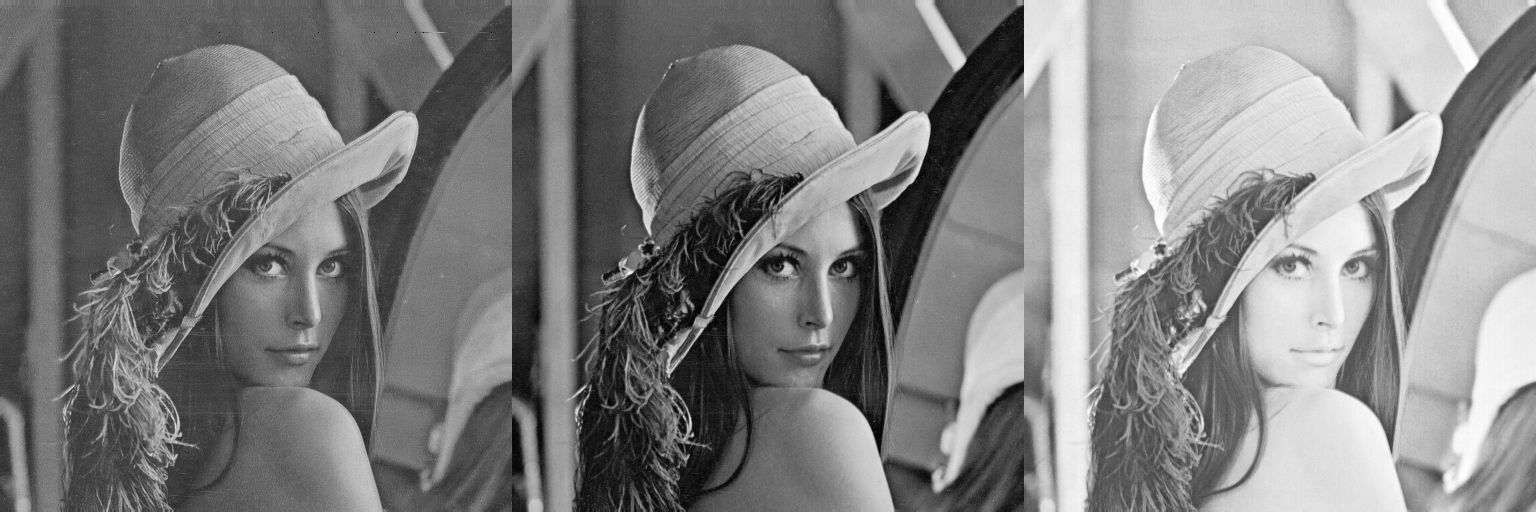

In [24]:
b,g,r = cv2.split(img_color) # Split the 3 channels
 
img_channels = np.concatenate((b, g, r), axis=1)
cv2_imshow(img_channels)
cv2.waitKey(0)
cv2.destroyAllWindows()

If we want to see each channel in its own color we can complete the code in the following way:


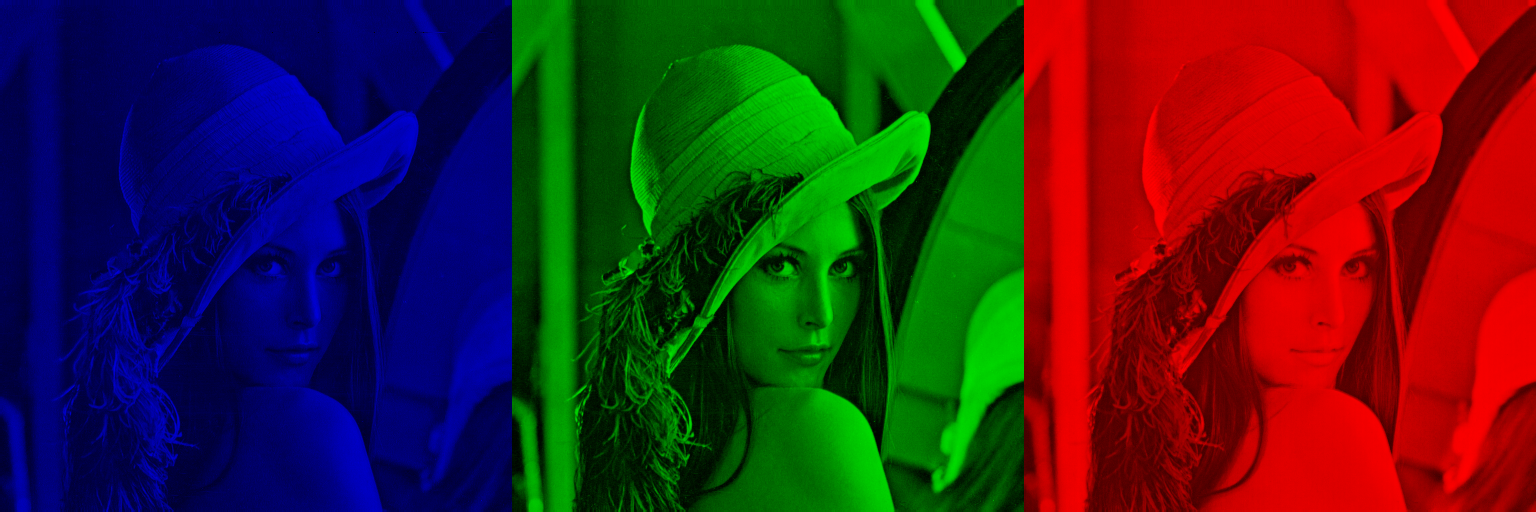

In [22]:
k = np.zeros_like(b)   # Create a matrix of zeros in the same dimentions as the original image
b = cv2.merge([b,k,k]) # Create a new blue channel image by making the other channels zero
g = cv2.merge([k,g,k]) # Create a new green channel image by making the other channels zero
r = cv2.merge([k,k,r]) # Create a new red channel image by making the other channels zero

img_channels = np.concatenate((b, g, r), axis=1)
cv2_imshow(img_channels)
cv2.waitKey(0)
cv2.destroyAllWindows()

We can also plot the histogram for each channel:

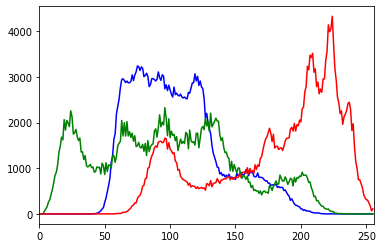

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_color],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()